In [2]:
%matplotlib inline
from mocpy import MOC
from astropy.io import fits
from astropy import wcs

In [3]:
image_path = 'demo-data/image_with_mask.fits.gz'

with fits.open(image_path) as hdulist:
    moc = MOC.from_image(header=hdulist[0].header,
                         max_norder=10,
                         mask_arr=hdulist[0].data)
    wcs = wcs.WCS(hdulist[0].header)

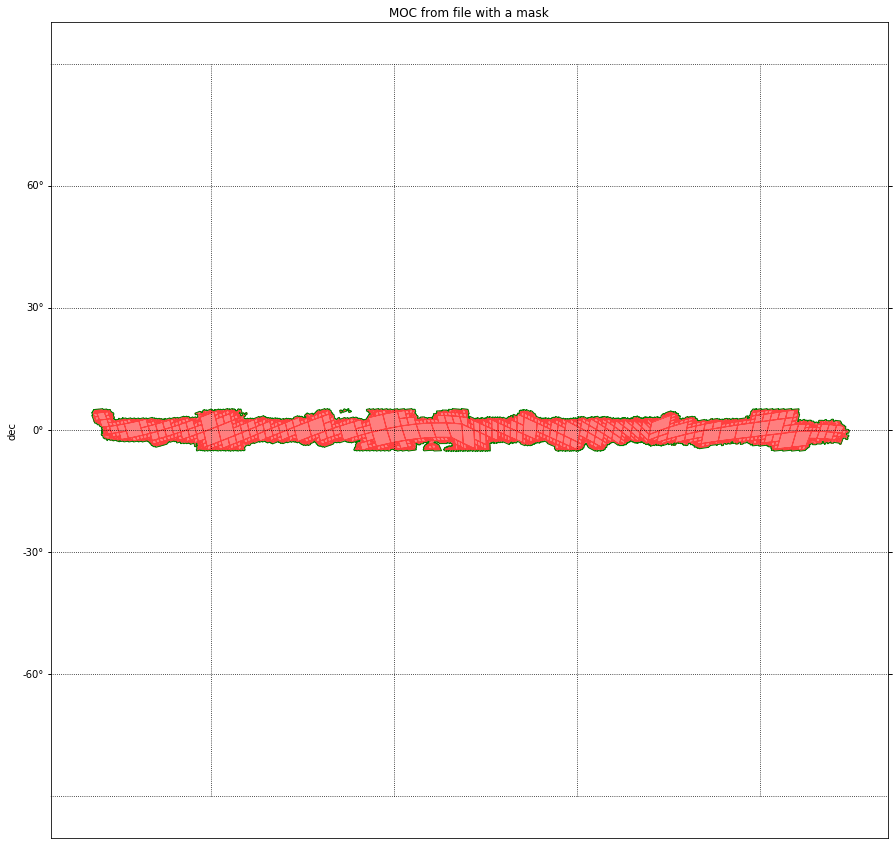

In [4]:
# A function creating all the matplotlib context for plotting a MOC with its perimeter
def plot(moc, wcs, title=''):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 1, figsize=(15, 15), subplot_kw={"projection": wcs})
    moc.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color='r')
    moc.border(ax=ax, wcs=wcs, color='black')

    plt.axis('equal')
    plt.xlabel('ra')
    plt.ylabel('dec')
    if title:
        plt.title(title)
    plt.grid(color="black", linestyle="dotted")
    plt.show()

plot(moc=moc, wcs=wcs, title='MOC from file with a mask')